# Code From Task 1 to create Graph (G)

In [1]:
import pandas as pd
import numpy as np
import networkx as nx

# Read data from Excel file
data_frame = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Modified Network Dataset.xlsx")

# Count total number of unique IDs in 'Roll Number' column
total_ids = data_frame['Roll Number'].nunique()

# Generate nodes from 0 to (total_ids - 1)
nodes = range(total_ids)

# Create a directed graph
graph = nx.DiGraph()

# Add nodes to the graph
for node in nodes:
    graph.add_node(node)

# Map roll numbers to nodes
node_roll_map = {node: roll_num for node, roll_num in zip(nodes, data_frame['Roll Number'])}

# Create edges
for node, roll_num in node_roll_map.items():
    # Get row index of DataFrame corresponding to the roll number
    row_index = data_frame.index[data_frame['Roll Number'] == roll_num].tolist()[0]

    # Iterate through columns (excluding 'Name' & 'Roll Number')
    for col in data_frame.columns[2:]:
        connected_roll_num = data_frame.loc[row_index, col]

        # Get the node corresponding to the connected roll number
        for connected_node, rn in node_roll_map.items():
            if rn == connected_roll_num:
                # Add an edge between the nodes
                graph.add_edge(node, connected_node)

# Convert graph to adjacency matrix
adjacency_matrix = nx.to_numpy_array(graph)
initial_matrix = adjacency_matrix.copy()

# Code for Task 2 below

In [2]:
# Find missing connections
for row in range(total_ids):
    for col in range(total_ids):
        # Check if the connection is missing in both directions and the nodes are not the same
        if adjacency_matrix[row][col] == adjacency_matrix[col][row] and adjacency_matrix[row][col] == 0 and row != col:
            # Mark the missing connections with -1 in both directions
            adjacency_matrix[row][col] = -1
            adjacency_matrix[col][row] = -1

In [3]:
def swap_matrix_rows(matrix, row1, row2, node_mapping):
   # Swap rows in the matrix
   for col in range(total_ids):
       # Swap elements in the current column
       temp = matrix[col][row1]
       matrix[col][row1] = matrix[col][row2]
       matrix[col][row2] = temp

       # Swap elements in the current row
       temp = matrix[row1][col]
       matrix[row1][col] = matrix[row2][col]
       matrix[row2][col] = temp

   # Swap corresponding nodes in the node mapping
   temp_node = node_mapping[row1]
   node_mapping[row1] = node_mapping[row2]
   node_mapping[row2] = temp_node

In [4]:
# Create a list of roll numbers to serve as the node mapping
node_mapping = list(node_roll_map.values())

# Index to keep track of the row to swap with
swap_index = 0

# Iterate over rows
for row in range(total_ids):
   # Check if the row needs to be swapped
   # (if it's connected to the first node or not connected at all)
   if adjacency_matrix[0][row] == 1 or adjacency_matrix[0][row] == 0:
       # Swap the current row with the row at swap_index
       swap_matrix_rows(adjacency_matrix, row, swap_index, node_mapping)

       # Increment the swap index for the next iteration
       swap_index += 1

In [5]:
def predict_link(matrix, row, col):
   try:
       # Extract submatrices for calculations
       A = matrix[:row-1, :col-1]  # Matrix up to (row-1, col-1)
       B = matrix[row, :col-1]     # Row vector up to col-1
       C = np.transpose(A)         # Transpose of A

       # Solve for x in Ax = B using least squares
       x = np.linalg.lstsq(C, B, rcond=None)[0]
       x = x.reshape(-1, 1)        # Reshape x to a column vector

       # Extract submatrix and calculate result
       M = matrix[:row-1, col]     # Column vector up to row-1
       M = M.reshape(-1, 1)
       result = np.dot(M.T, x)     # Dot product of M^T and x

       # Return 1 if result is positive, 0 otherwise
       if result > 0:
           return 1
       else:
           return 0
   except np.linalg.LinAlgError:
       # Return 0 if there's a linear algebra error
       return 0

In [6]:
# Fill missing connections
for row in range(total_ids):
    for col in range(total_ids):
        if row != col:
            if adjacency_matrix[row, col] == -1:
                adjacency_matrix[row, col] = predict_link(adjacency_matrix, row, col)

# Visualization to show difference between Original and Resulting Matrix

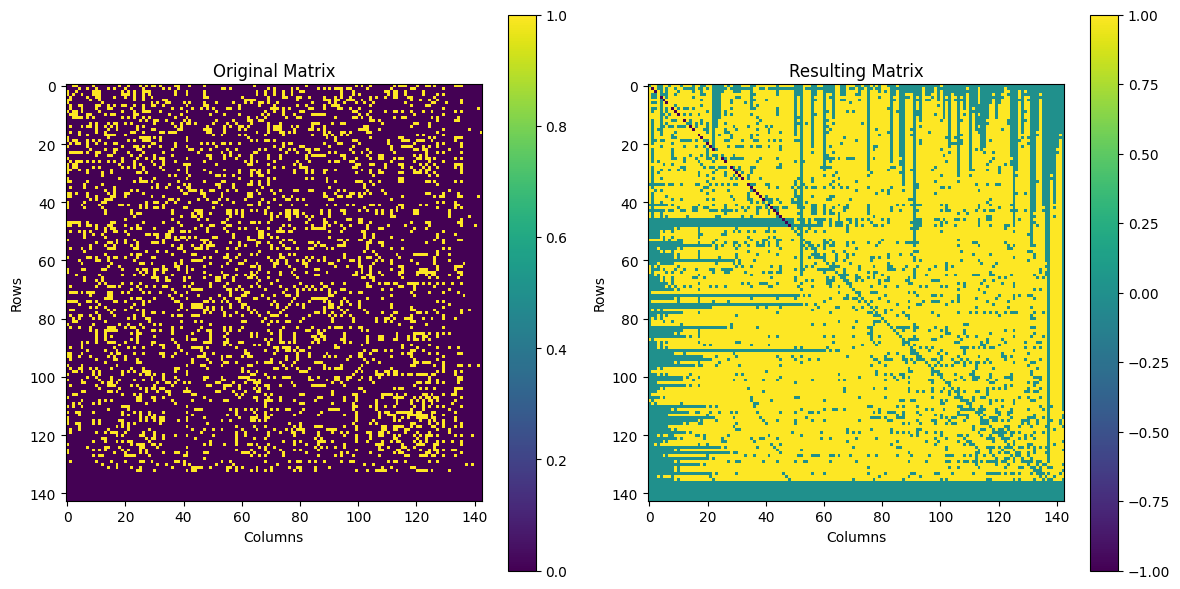

In [7]:
import matplotlib.pyplot as plt

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original matrix
im1 = axs[0].imshow(initial_matrix, cmap='viridis', interpolation='nearest')
axs[0].set_title('Original Matrix')
axs[0].set_xlabel('Columns')
axs[0].set_ylabel('Rows')
axs[0].grid(False)
fig.colorbar(im1, ax=axs[0])

# Plot the resulting matrix
im2 = axs[1].imshow(adjacency_matrix, cmap='viridis', interpolation='nearest')
axs[1].set_title('Resulting Matrix')
axs[1].set_xlabel('Columns')
axs[1].set_ylabel('Rows')
axs[1].grid(False)
fig.colorbar(im2, ax=axs[1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Loop to print missing links

In [8]:
# Print the identified connections
for row in range(total_ids):
    for col in range(total_ids):
        if adjacency_matrix[row][col] == 1:
            print(node_mapping[row], " --> ", node_mapping[col])

Streaming output truncated to the last 5000 lines.
2022MCB1380  -->  2022CSB1091
2022MCB1380  -->  2022MCB1337
2022MCB1380  -->  2022CSB1150
2022MCB1380  -->  2023CSB1134
2022MCB1380  -->  2023CSB1094
2022MCB1380  -->  2023MCB1287
2022MCB1380  -->  2023CSB1133
2022MCB1380  -->  2022CSB1319
2022MCB1380  -->  2023MCB1295
2022MCB1380  -->  2023MCB1310
2022MCB1380  -->  2023CSB1139
2022MCB1380  -->  2020MCB1225
2022MCB1380  -->  2023CSB1141
2022MCB1380  -->  2023CSB1109
2022MCB1380  -->  2023CSB1126
2022MCB1380  -->  2023MCB1285
2022MCB1380  -->  2022CSB1157
2022MCB1380  -->  2022MCB1363
2022MCB1380  -->  2023MCB1290
2022MCB1380  -->  2023CSB1091
2022MCB1380  -->  2023MCB1296
2022MCB1380  -->  2023CSB1119
2022MCB1380  -->  2022CSB1136
2022MCB1380  -->  2023MCB1306
2022MCB1380  -->  2023CSB1143
2022MCB1380  -->  2023CSB1130
2022MCB1380  -->  2023CSB1144
2022MCB1380  -->  2023CSB1156
2022MCB1380  -->  2023MCB1294
2022MCB1380  -->  2023CSB1107
2022MCB1380  -->  2023CSB1110
2022MCB1380  -->  2